In [ ]:
python3 datasetGenerator_hw2.py --ID 1002069069

In [8]:
# Open the input file and read the contents into a list of reads
with open("1002069069.txt", "r") as file:
    reads = file.read().splitlines()
    
# Initialize a set to store the unique k-mers
kmers = set()

In [9]:
# Iterate through each read and extract all k-mers of length 2
for read in reads:
    for i in range(len(read)-1):
        kmer = read[i:i+2]
        kmers.add(kmer)


In [10]:
# Write the k-mers to a file called "kmers.txt"
with open("kmers.txt", "w") as file:
    for kmer in kmers:
        file.write(kmer + "\n")


In [11]:
with open("1002069069.txt", "r") as f:
    kmers = [line.strip() for line in f.readlines()]

In [12]:
def generate_edges(kmers):
    edges = {}
    for kmer in kmers:
        left_node = kmer[:-1]
        right_node = kmer[1:]
        if left_node in edges:
            edges[left_node] |= frozenset([right_node])
        else:
            edges[left_node] = frozenset([right_node])
        if right_node not in edges:
            edges[right_node] = set()
    return edges

edges = generate_edges(kmers)

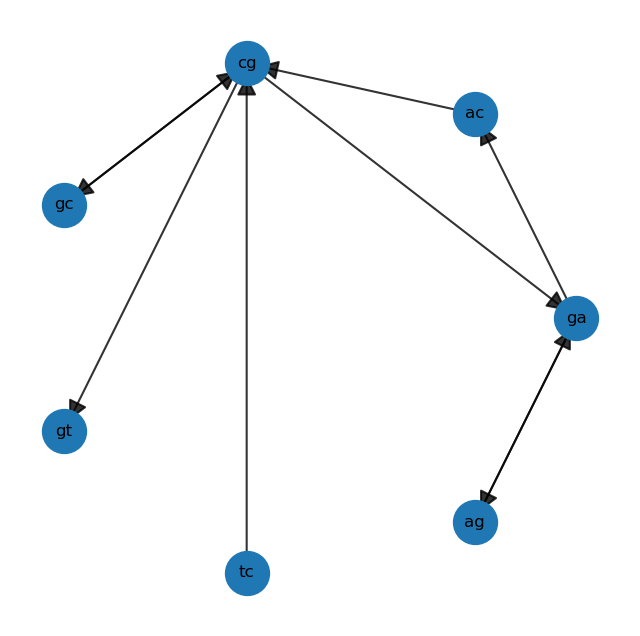

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph(edges)

# Create the De Bruijn graph
edges = [(kmer[:-1], kmer[1:]) for kmer in kmers]
G = nx.DiGraph(edges)

# Set up the circular layout
pos = nx.circular_layout(G)

# Draw the graph
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_size=1000, ax=ax)
nx.draw_networkx_edges(G, pos, edge_color='black', width=1.5, alpha=0.8, arrowsize=30)

# Add labels to the nodes
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=12)

plt.axis('off')
plt.show()